In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('C:\\Users\\kusha\\Desktop\\Projects\\heart_rate_disease\\heart.csv')

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.shape

(918, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [13]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

So, our dataset contains 918 samples and 11 features and 1 label, Heart Disease we need to predict. Mostly it contains numeric variables and some categorical variables. It doesn't have any missing values.

We need to check the correlation between data, so we make some summary about data relationship

In [14]:
import seaborn as sns

<AxesSubplot:>

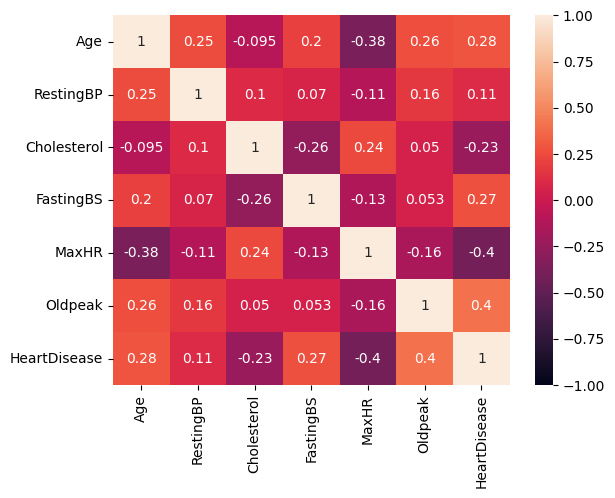

In [15]:
sns.heatmap(df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr(),vmin=-1, vmax=1, annot=True)

We can see that Heart Disease has slight positive correlation with age, fasting blood sugar and oldpeak, out of these strongest linear correlation has oldpeak. Cholesterol and max heart rate have slight negative relationship. Features do not correlate strongly with each other.

In [16]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [17]:
df[df['Cholesterol']==0].shape

(172, 12)

After some googling I found out that it is not possible to have 0 Cholesterol value, so I assume it as not complete data. 172 samples cannot be eliminated, as it can make our model poor. As I don't have domain knowledge I will leave it as it is, cause I don't know whether it is correct, or if I can substitute it with mean value, etc.

In [18]:
df[df['RestingBP']==0].shape

(1, 12)

It is also impossible to have 0 pressure, and it is only 1 sample, so I simply remove it.

In [19]:
df.drop(df[df['RestingBP']==0].index, axis=0, inplace=True)

In [20]:
df['RestingBP'].describe()

count    917.000000
mean     132.540894
std       17.999749
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

In [21]:
df['Sex'].value_counts()

M    724
F    193
Name: Sex, dtype: int64

We see that in the dataset we have 724 males and 193 females, so dataset's sex feature is unbalanced.

In [22]:
df['HeartDisease'].value_counts()

1    507
0    410
Name: HeartDisease, dtype: int64

We have 500 samples with heart disease and 400 samples which do not. We can say our classes are balanced.

In [23]:
df[(df['Sex']=='M') & (df['HeartDisease']==1)].shape[0]/df[df['Sex']=='M'].shape[0]

0.6312154696132597

63% of all male in dataset have Heart Disease

In [24]:
df[(df['Sex']=='F') & (df['HeartDisease']==1)].shape[0]/df[df['Sex']=='F'].shape[0]

0.25906735751295334

And only 26% of female have Heart Disease, by this we can make conclusion, that in our dataset more male have heart disease compared to female.

Some features in our dataset are categorical, and, in my opinion they don't have ordering. Therefore, I will represent them as dummy variables.

In [25]:
cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns = cols, drop_first=True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


We will use Logistic Regression algorithm, so data needs to be scaled for algorithm to be able to find global minimum, as scale of some features is greater than others. I will use StandardScaler standardization to normalizethe data. Before that we need to split our data in training and test sets.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((733, 15), (184, 15), (733,), (184,))

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [30]:
cols_to_norm = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
ct = ColumnTransformer([('sc', StandardScaler(), cols_to_norm)], remainder='passthrough')

In [31]:
X_train[cols_to_norm] = ct.fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = ct.transform(X_test[cols_to_norm])
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
188,-0.329365,-0.676877,1.218148,0,-1.063286,0.125397,0,0,0,0,1,0,1,1,0
827,-1.057800,-0.566363,0.130546,0,1.079819,-0.614371,0,0,1,0,1,0,0,1,0
892,-1.474048,0.317745,0.196748,0,0.573267,-0.799313,0,0,1,0,1,0,0,1,0
743,-0.121240,0.096718,0.017057,0,0.807060,-0.059545,1,1,0,0,1,0,0,0,1
305,-0.225302,-0.676877,-1.883882,1,-0.400872,0.587752,0,0,0,0,1,0,1,0,1


Now, we need to tune our algorithm, for this we can use GridSearch, so it will evaluate each C hyperparameter for our model, and give us the best, regarding the scoring technique. For scoring I will use f-score, which is harmonic mean of precision and recall. For regularization I will use L2 regularization as requested.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {'C' : np.logspace(-5, 5, 15)}
param_grid

{'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
        7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
        5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
        3.72759372e+03, 1.93069773e+04, 1.00000000e+05])}

In [34]:
reg = LogisticRegression(penalty='l2')
gridsearch = GridSearchCV(reg, param_grid, scoring='f1_macro', cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 5.17947468e-05, 2.68269580e-04, 1.38949549e-03,
       7.19685673e-03, 3.72759372e-02, 1.93069773e-01, 1.00000000e+00,
       5.17947468e+00, 2.68269580e+01, 1.38949549e+02, 7.19685673e+02,
       3.72759372e+03, 1.93069773e+04, 1.00000000e+05])},
             scoring='f1_macro')

In [35]:
gridsearch.best_params_

{'C': 5.1794746792312125}

In [36]:
gridsearch.best_score_

0.8611790759646439

So grid search shows that best value for C is 0.19, which gave us f-score of about 0.86, so for my model I will use C=0.2.

Now, we want to visulaize the regularization path taken by our model.

In [37]:
cs = np.array(param_grid['C'])

clf = LogisticRegression()
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X_train, y_train)
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)

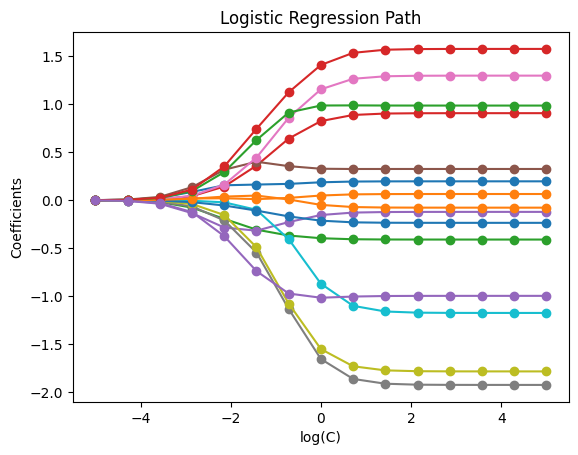

In [38]:
plt.plot(np.log10(param_grid['C']), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

Coefficients in our model are in the range between about -1.2 and +1.2. There is no features which were eliminated by regularization, and there is no features which were weighted much more than others.

Now it is time to test our model on test set, and evaluate its performance. I will evaluate the model by accuracy, precision, recal and f-score

In [39]:
regressor = LogisticRegression(C=0.2, penalty='l2')

In [40]:
regressor.fit(X_train, y_train)

LogisticRegression(C=0.2)

In [42]:
regressor.coef_

array([[ 0.17078548,  0.02499098, -0.36778838,  0.64723087, -0.22491929,
         0.35402739,  0.86719178, -1.14493701, -1.08813323, -0.41500779,
        -0.16925332,  0.00653319,  0.91670865,  1.13150999, -0.97352284]])

In [41]:
y_pred = regressor.predict(X_test)

In [36]:
y_pred.shape, y_test.shape

((184,), (184,))

In [37]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [38]:
acc = accuracy_score(y_test, y_pred)
acc

0.8532608695652174

In [39]:
p, r, f1, s = precision_recall_fscore_support(y_test, y_pred)
print(f"\nPrecision of Class O (no heart disease): {p[0]:.2f}")
print(f"Recall of Class O (no heart disease): {r[0]:.2f}")
print(f"F-score of Class O (no heart disease): {f1[0]:.2f}")
print(f"Support of Class O (no heart disease): {s[0]:.2f}")
print(f"\nPrecision of Class 1 (with heart disease): {p[1]:.2f}")
print(f"Recall of Class 1 (with heart disease): {r[1]:.2f}")
print(f"F-score of Class 1 (with heart disease): {f1[1]:.2f}")
print(f"Support of Class 1 (with heart disease): {s[1]:.2f}")


Precision of Class O (no heart disease): 0.84
Recall of Class O (no heart disease): 0.80
F-score of Class O (no heart disease): 0.82
Support of Class O (no heart disease): 76.00

Precision of Class 1 (with heart disease): 0.86
Recall of Class 1 (with heart disease): 0.89
F-score of Class 1 (with heart disease): 0.88
Support of Class 1 (with heart disease): 108.00


So I got high values of precision, recall, f-score for both classes. I think for us it is more important to have higher recall for Class 1 than precision, because, in my opinion, it is more important to guess all the people who have heart disease, rather than incorrectly classify healthy people as people with heart disease. Due to precision-recall-tradeoff, we can't improve both, so we need to sacrifice precision to improve recall. Ways to improve recall could be obtaining more data for better evaluating the model, trying other models, discuss the data with domain expert, or even change the decision function threshold.

In general, our model classifies correctly 85% of all samples. In summary, I can say that we predicted 86% of people with heart disease, and 82% of predicted people actually have heart disease. We had only 900 samples, which, obviously, not enough for this kind of task, as it is about saving human lives. So, collecting mor information about this topic or adding new features may be a good idea to improve classifier. I think, trying other classification models would be good decision, to get more insights about domain and make conclusions.